In [48]:
import h5py
import numpy as np
import os
from readable_number import ReadableNumber
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
rn = ReadableNumber
sns.set_theme()

experiment = "capacity_sensitivity"

# config_folders = os.listdir(f"experiments/{experiment}")
#benchmarks = ['BC', 'BFS', 'CC', 'PR', 'SSSP']
#benchmarks = ['BFS', 'PR', 'SSSP']
benchmarks = ['BC', 'CC', 'BFS', 'PR', 'SSSP']
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1408MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']

data_dict = {}
for benchmark in benchmarks:
    benchmark_lower = benchmark.lower()
    data_dict[benchmark] = {}
    for config in configs:
        data_dict[benchmark][config] = h5py.File(f"experiments_copy_with_bc_cc/{experiment}/{config}/{benchmark_lower}_data/zsim-ev.h5", 'r')["stats"]["root"]


[0.15194976 0.14416449 0.11989362 0.08141506 0.12078868]
[0.21261157 0.21629174 0.14716064 0.12103511 0.16818486]
[0.26399786 0.26218571 0.20819907 0.13221521 0.19287203]
[0.30902542 0.26858853 0.22820471 0.13360024 0.19936596]
[0.35161278 0.26937035 0.22895318 0.13403246 0.20426256]
[0.38490244 0.26890116 0.22895473 0.2816208  0.20628653]
[[1.         1.39922285 1.73740232 2.03373426 2.31400688 2.53309026]
 [1.         1.5003122  1.8186567  1.86306999 1.86849307 1.86523855]
 [1.         1.22742676 1.73653163 1.90339327 1.90963605 1.90964899]
 [1.         1.48664283 1.6239651  1.64097707 1.64628583 3.45907513]
 [1.         1.39238927 1.59677242 1.65053515 1.69107373 1.70783007]
 [1.         1.39965655 1.71376576 1.84206325 1.92204631 2.21714648]]
      768MBLLC  1024MBLLC  1280MBLLC  1536MBLLC  1792MBLLC  2048MBLLC
BC         1.0   1.399223   1.737402   2.033734   2.314007   2.533090
CC         1.0   1.500312   1.818657   1.863070   1.868493   1.865239
BFS        1.0   1.227427   1.736

(0.0, 2.75)

<Figure size 2000x600 with 0 Axes>

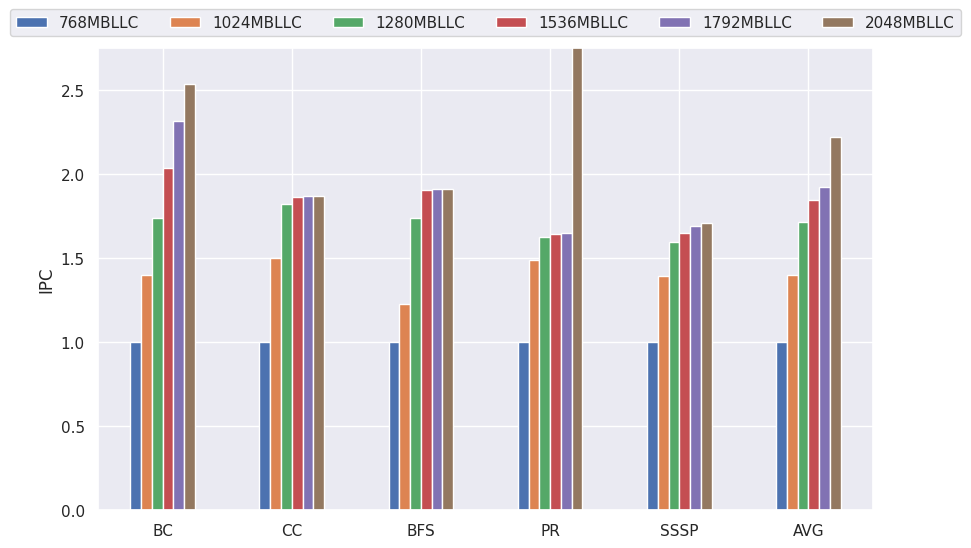

In [47]:

# calculate AVG
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
ipcs = []
for i in range(len(configs)):
    ipcs.append([])
    for j in range(len(benchmarks)):
        ipc = np.sum(data_dict[benchmarks[j]][configs[i]][-1]['beefy']['instrs'])/np.sum(data_dict[benchmarks[j]][configs[i]][-1]['beefy']['cycles'])
        ipcs[i].append(ipc)
    ipcs[i] = np.array(ipcs[i])
    #print(ipcs[i])
    ipcs[i] = np.append(ipcs[i], np.mean(ipcs[i]))
    #pcs[i] = ipcs[i]/np.min(ipcs[i])

ipcs = np.array(ipcs)
ipcs = np.transpose(ipcs)
for i in range(len(ipcs)):
    ipcs[i] = ipcs[i]/np.min(ipcs[i])

#print(ipcs)

benchmark_labels = ['BC', 'CC', 'BFS', 'PR', 'SSSP', 'AVG']
config_labels = ['768MB', '1024MB', '1280MB', '1536MB',  '1792MB', '2048MB']
df = pd.DataFrame(data=ipcs, index=benchmark_labels, columns=config_labels)
#print(df)

#fig, ax = plt.subplots()
#ax.plot(data=df)
#plt.figure(figsize=(20,6))
#fig, ax = plt.subplots(figsize=(6, 6
plt.rcParams['figure.figsize'] = (10, 6);
plt.figure(figsize=(20, 6));
df.plot.bar(stacked=False);
plt.legend(loc='upper center', bbox_to_anchor=(.5,1.1), ncol=len(config_labels)/1,);
plt.ylabel("IPC");
plt.xticks(rotation=0);
plt.ylim(0,2.75);
#plt.gca().set_aspect('equal')


In [ ]:

"""
# Create plot for IPC
#configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
ipcs = []
for k in configs:
    ipcs.append(np.sum(data_dict[k][-1]['beefy']['instrs'])/np.sum(data_dict[k][-1]['beefy']['cycles']))

plt.rcParams["font.family"] = "sans-serif"
ipcs = np.array(ipcs)
ipcs = ipcs/np.min(ipcs)

fig, ax = plt.subplots()
config_labels = ['768MB', '1024MB', '1280MB', '1536MB',  '1792MB', '2048MB']
ax.bar(config_labels, ipcs)

fig.tight_layout()

ax.set_ylabel("IPC")
ax.set_ylim(0,3)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+.01, y[i], ha = 'center')

addlabels(config_labels, np.around(ipcs, decimals=2))

resolution_value = 800
plt.savefig("figs/capacity_sweep.png", format="png", dpi=resolution_value, bbox_inches='tight')
"""

KeyError: '768MBLLC'

: 

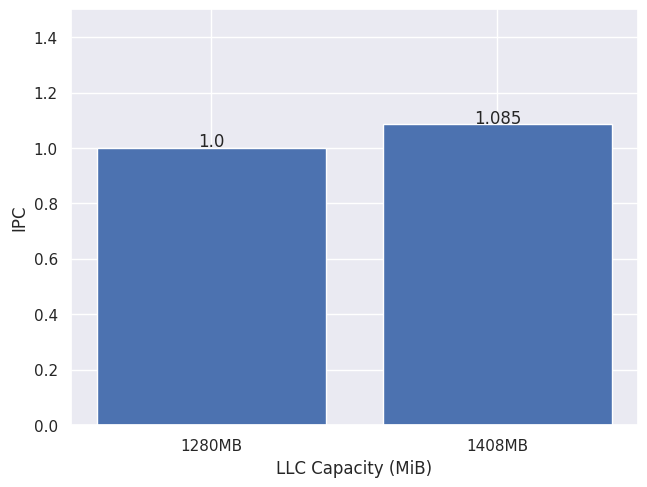

In [ ]:
# Create plot for IPC
configs = ['1280MBLLC', '1408MBLLC']
ipcs = []
for k in configs:
    ipcs.append(np.sum(data_dict[k][-1]['beefy']['instrs'])/np.sum(data_dict[k][-1]['beefy']['cycles']))

ipcs = np.array(ipcs)
ipcs = ipcs/np.min(ipcs)

fig, ax = plt.subplots()
config_labels = ['1280MB', '1408MB']
ax.bar(config_labels, ipcs)
fig.tight_layout()

ax.set_ylabel("IPC")
ax.set_ylim(0,1.5)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+.005, y[i], ha = 'center')

addlabels(config_labels, np.around(ipcs, decimals=3))

resolution_value = 800
plt.savefig("figs/uplift.png", format="png", dpi=resolution_value, bbox_inches='tight')

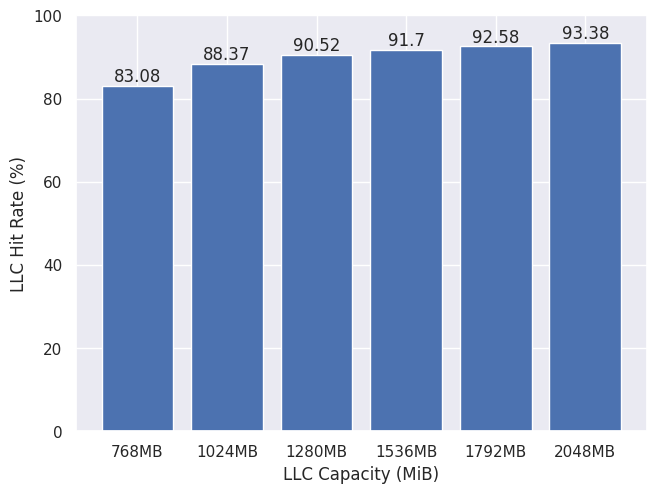

In [ ]:
# Create plot for IPC
configs = ['768MBLLC', '1024MBLLC', '1280MBLLC', '1536MBLLC',  '1792MBLLC', '2048MBLLC']
l3_hit_rates = []
for k in configs:
    hGETS = np.sum(data_dict[k][-1]['l3']['hGETS'])
    hGETX = np.sum(data_dict[k][-1]['l3']['hGETX'])
    hits = hGETS + hGETX
    mGETS = np.sum(data_dict[k][-1]['l3']['mGETS'])
    mGETXIM = np.sum(data_dict[k][-1]['l3']['mGETXIM'])
    mGETXSM = np.sum(data_dict[k][-1]['l3']['mGETXSM'])
    misses = hits + mGETS + mGETXIM
    l3_hit_rates.append(hits/misses*100)

l3_hit_rates = np.array(l3_hit_rates)

fig, ax = plt.subplots()
config_labels = ['768MB', '1024MB', '1280MB', '1536MB',  '1792MB', '2048MB']
ax.bar(config_labels, l3_hit_rates)

fig.tight_layout()

ax.set_ylabel("LLC Hit Rate (%)")
ax.set_ylim(0,100)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

addlabels(config_labels, np.around(l3_hit_rates, decimals=2))


resolution_value = 800
plt.savefig("figs/llc_hit_rate.png", format="png", dpi=resolution_value, bbox_inches='tight')


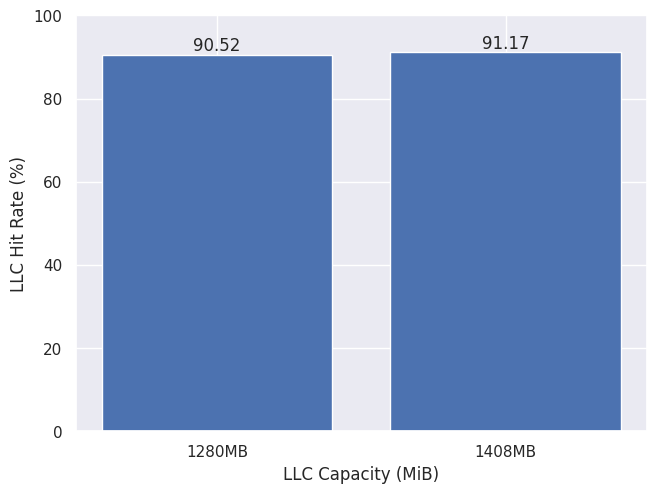

In [ ]:
# Create plot for IPC
configs = ['1280MBLLC', '1408MBLLC']
l3_hit_rates = []
for k in configs:
    hGETS = np.sum(data_dict[k][-1]['l3']['hGETS'])
    hGETX = np.sum(data_dict[k][-1]['l3']['hGETX'])
    hits = hGETS + hGETX
    mGETS = np.sum(data_dict[k][-1]['l3']['mGETS'])
    mGETXIM = np.sum(data_dict[k][-1]['l3']['mGETXIM'])
    mGETXSM = np.sum(data_dict[k][-1]['l3']['mGETXSM'])
    misses = hits + mGETS + mGETXIM
    l3_hit_rates.append(hits/misses*100)

l3_hit_rates = np.array(l3_hit_rates)

fig, ax = plt.subplots()
config_labels = ['1280MB', '1408MB']
ax.bar(config_labels, l3_hit_rates)

fig.tight_layout()

ax.set_ylabel("LLC Hit Rate (%)")
ax.set_ylim(0,100)
ax.set_xlabel("LLC Capacity (MiB)")

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

addlabels(config_labels, np.around(l3_hit_rates, decimals=2))


resolution_value = 800
plt.savefig("figs/llc_hit_rate_uplift.png", format="png", dpi=resolution_value, bbox_inches='tight')